In [1]:
import requests
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import plotly.express as px
import json
from pprint import pprint
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\ledne\AppData\Local\Temp\ipykernel_10328\972141324.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
# отображать текст в датафрейме полностью
# pd.set_option('display.max_colwidth', None)

In [3]:
# отображать все колонки
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("processed_data.csv")

In [5]:
df.head(5)

,name,role,employer.name,area.name,salary_from,salary_to,snippet.requirement,snippet.responsibility,experience.name,accept_temporary,published_at,url,employment.name,id,salary.gross,key_skills,schedule,description,common_role,profession,country,language,language_level,1c,3nf,590-п,a/b test,abc-анализ,ad hoc analysis,adobe photoshop,agile,amazon,amqp,analysis,analyst,analytics,ansible,apache airflow,apache atlas,apache hadoop,apache kafka,apache nifi,apache spark,apache стек,api,apple search ads,appmetrica,appsflyer,arenadata db,asp.net,attribution,audioediting,auto-encoders,avro,aws,azure,b2b,b2b marketing,b2c,backend,bash,bcbs,bert,bi tool,bi visiology,bi системы,big data,bigquery,bitrix24,bpmn,business analysis,business intelligence,c#,c++,c/c++,caffe,calypso,cassandra,catboost,causal inference,cdc,chat gpt,chef,ci/cd,ci\\cd,clickhouse,cloud,column-oriented,computer vision,confluence,cost of risk,cpc,crm,css,cuda,cx исследования,cython,dagster,dask,data,data analysis,data engineering,data governance,data lake,data mining,data mining statistica,data modeling,data quality,data science,data vault,data vault 2.0,database management,databases,databricks,datadriven,datalake,datalens,dataquality,datavault,dax,dbt,debezium,deductor,deep learning,deep reinforcement learning,deep structured learning,dei,devops,digital marketing,django,django framework,dml,docker,dremio,ds,dsp,dvc,dwh,dwh\\data lake,ead,ecomm,elastic,elasticsearch,elk,elmo,elt,engineering,english,english b1,english b2,er-модель,erp,etl,excel,face analyze,face detection,facebook,facebook api,fast api,fastapi,feature store,finagle,fintech,flask,flink,fluent english,future store,gamedev,gan,general dl,generative ai,gensim,git,github,gitlab,glove,gnn,go,golang,google adwords,google analytics,google api,google cloud platform,google docs,google sheets,google tag manager,gpt,grafana,graph embedding,graph-oriented,graphql,greenplum,groovy,gtm,hadoop,hdfs,helm,hive,html,html5,http,hypersonic sql,image recognition,impala,inference optimization,informatica,informatica axon data governance,internet,irb,iron python,it,java,java se,java/scala,javascript,jenkins,jira,js,json,json api,jupyter notebook,jython,k-means,k8s,kafka,kanban,keras,kerastase,kibana,knowledge graph embedding (kge),knowledge management,ksqldb,kuberflow,kubernetes,layoutlm,lgd,libreoffice,linux,llm,loginom,looker,ltv,luigi,luxms bi,machine learning,map-reduce,maple,mapreduce,mariadb,mathematical analysis,mathematical modeling,mathematical statistics,mathematics,matlab,matplotlib,mdm,mdx,microservices,microsoft access,miner,minio,mipt+huawei,ml flow,ml system design,ml/ds,mlflow,mlops,mongodb,mpp,mpstats,ms access,ms crm,ms excel,ms excel (vba power query) python,ms power bi,ms powerbi,ms powerpoint,ms project,ms sql,ms sql server,multi-armed bandits,multi-relation learning,mysql,neo4j,ner,network security,neural nets,ni-fi,nifi,nlp,nosql,numpy,object detection,ocr,odi,ods,olap,olap (online analytical processing),opencv,openoffice,openshift,oracle,oracle bi,oracle crm,oracle db,oracle pl/sql,oracle python (jupyter notebook pandas statsmodels scikit learn scipy),os linux/unix,pandas,pbi,pca,pd,pd lgd ead,pd/lgd,pl/sql,plotly,pmbok,postgresql,postman,power apps,power bi,power pivot,power query,powerbi,powerbi qlicksense,powerbi qlikview qliksense,presto,product development,project management,pycharm,pypy,pyspark,pytest,python,python pycharm jupyterhub,pyton,pytorch,qlik,qlik sense,qliksense,qlikview,qt,r,r rstudio,r studio,r&d проекты в области ai/ml,rabbitmq,random forest,rdbms,recommender systems,recsys,redash,redis,redshift,reinforcement learning,remote config,reporting,requests,rest,rest api,rnd,rstudio,rust,s3,sap,sap business objects,sap process integration,sas,sas di,scala,scikit,scikit-learn,scipy,scl,scrum,seaborn,search engine,search ranking,semantic segmentation libraries,senior data scientist,shell scripting,sklearn,snowflake,sns,soap,soft skills,spark,spark streaming,speech,speech2text,spring boot,spring

# Salary

In [7]:
df_salary = df.groupby(['profession','experience.name']).aggregate({'salary_from':['min', 'mean', 'median','max'],'salary_to':['min', 'mean', 'median','max']
                                              ,'salary':['min', 'mean', 'median','max'] })
df_salary

salary_from               \
                                                       min         mean   
profession                  experience.name                               
Data Scientist/ML developer Более 6 лет             3902.0  5304.333333   
                            Нет опыта                290.0   554.400000   
                            От 1 года до 3 лет       447.0  1970.225000   
                            От 3 до 6 лет            546.0  2502.428571   
Data analyst                Более 6 лет             3561.0  3561.000000   
                            Нет опыта                474.0   583.500000   
                            От 1 года до 3 лет       474.0  1424.375000   
                            От 3 до 6 лет           1068.0  2190.400000   
Data engineer               Более 6 лет             2905.0  4643.000000   
                            Нет опыта                415.0   726.750000   
                            От 1 года до 3 лет       771.0  1502.062500   
                            От 3 до 6 лет           1660.0  3314.678571   
MLOps                       Более 6 лет                NaN          NaN   
                            Нет опыта                  NaN          NaN   
                            От 1 года до 3 лет      1565.0  2621.000000   
                            От 3 до 6 лет           2374.0  2889.833333   

                                                               salary_to  \
                                                median     max       min   
profession                  experience.name                                
Data Scientist/ML developer Более 6 лет         6000.0  6011.0    5579.0   
                            Нет опыта            474.0  1000.0     415.0   
                            От 1 года до 3 лет  1780.0  5500.0     670.0   
                            От 3 до 6 лет       2671.0  4155.0     546.0   
Data analyst                Более 6 лет         3561.0  3561.0    5093.0   
                            Нет опыта            545.5   769.0     679.0   
                            От 1 года до 3 лет  1245.0  3825.0     679.0   
                            От 3 до 6 лет       2064.5  3561.0    1527.0   
Data engineer               Более 6 лет         4155.0  7000.0    4155.0   
                            Нет опыта            741.5  1009.0     593.0   
                            От 1 года до 3 лет  1305.0  2611.0    1103.0   
                            От 3 до 6 лет       2968.0  5465.0    2374.0   
MLOps                       Более 6 лет            NaN     NaN       NaN   
                            Нет опыта              NaN     NaN       NaN   
                            От 1 года до 3 лет  2374.0  4000.0    2374.0   
                            От 3 до 6 лет       2702.5  4155.0    3395.0   

                                                                              \
                                                       mean  median      max   
profession                  experience.name                                    
Data Scientist/ML developer Более 6 лет         6743.333333  7000.0   7651.0   
                            Нет опыта            917.200000   679.0   2000.0   
                            От 1 года до 3 лет  2955.900000  2546.0   8000.0   
                            От 3 до 6 лет       3716.285714  3561.0   7651.0   
Data analyst                Более 6 лет         5093.000000  5093.0   5093.0   
                            Нет опыта            830.500000   771.5   1100.0   
                            От 1 года до 3 лет  2044.250000  1780.0   4700.0   
                            От 3 до 6 лет       3075.100000  2908.5   5093.0   
Data engineer               Более 6 лет         6447.800000  5942.0  10000.0   
                            Нет опыта           1013.750000  1009.5   1443.0   
                            От 1 года до 3 лет  2105.250000  1867.0   3561.0   
                            От 3 до 6 лет       4540.714

#### Соотношение количества предложений по всем профессиям

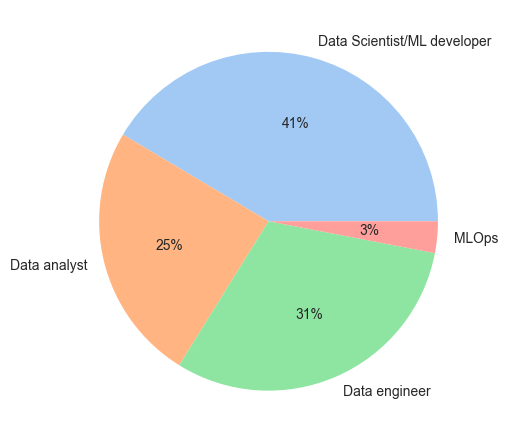

In [8]:
df_pie = df.groupby('profession').aggregate({'profession':'count'})
plt.pie(df_pie.profession, labels = df_pie.index, colors = sns.color_palette('pastel')[ 0:5 ], autopct='%.0f%%')
plt.show()

Больше всего на рынке предложений для специальносте Data Scientist/ML engineer

#### Распределение усредненных зарплат  по профессиям

Добавим для удобства еще один столбец, связанный с зарплатой - salary - среднее между максимумом и минимумом в зарплатной вилке

In [6]:
df['salary'] = (df.salary_from +df.salary_to)/2

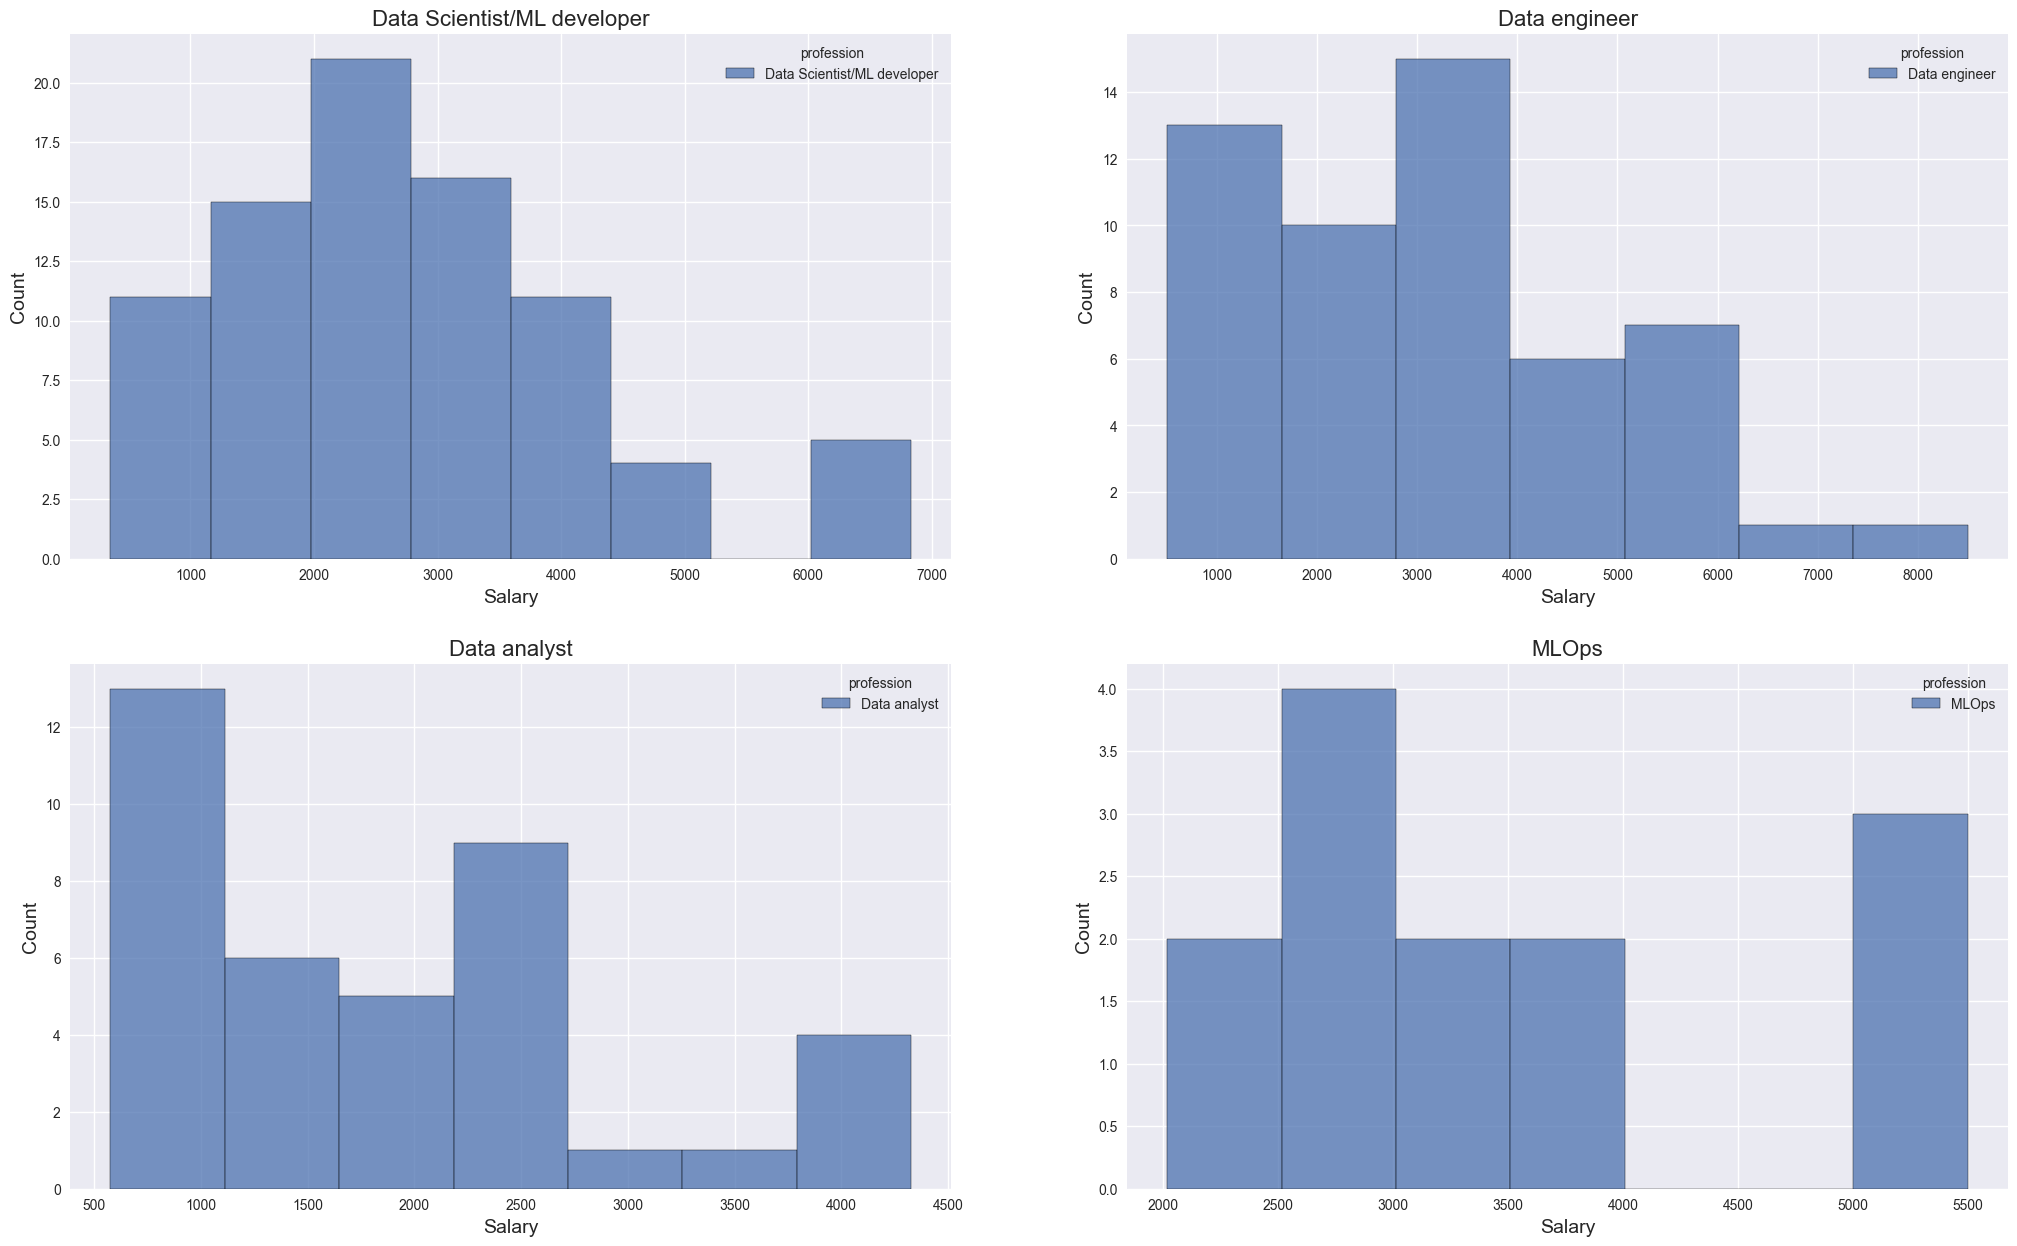

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 15))
histplot1 = sns.histplot(data=df[df.profession == 'Data Scientist/ML developer'],
                         x="salary",   
                         hue="profession", 
                         multiple="dodge",
                         ax = axes[0][0])

histplot1.set_title('Data Scientist/ML developer', fontsize=16);
histplot1.set_xlabel('Salary', fontsize=14);
histplot1.set_ylabel('Count', fontsize=14);

histplot2 = sns.histplot(data=df[df.profession == 'Data engineer'],
                         x="salary",
                         hue="profession",
                         multiple="dodge",
                         ax = axes[0][1],
                         shrink=1)

histplot2.set_title('Data engineer', fontsize=16);
histplot2.set_xlabel('Salary', fontsize=14);
histplot2.set_ylabel('Count', fontsize=14);

histplot3 = sns.histplot(data=df[df.profession == 'Data analyst'],
                         x="salary",
                         hue="profession",
                         multiple="dodge",
                         ax = axes[1][0],
                         shrink=1)

histplot3.set_title('Data analyst', fontsize=16);
histplot3.set_xlabel('Salary', fontsize=14);
histplot3.set_ylabel('Count', fontsize=14);

histplot4 = sns.histplot(data=df[df.profession == 'MLOps'],
                         x="salary",
                         hue="profession",
                         multiple="dodge",
                         ax = axes[1][1],
                         shrink=1)

histplot4.set_title('MLOps', fontsize=16);
histplot4.set_xlabel('Salary', fontsize=14);
histplot4.set_ylabel('Count', fontsize=14);


Распределение усредненных зарплат в выборке по профессиям на одном графике

<Axes: xlabel='salary', ylabel='Count'>

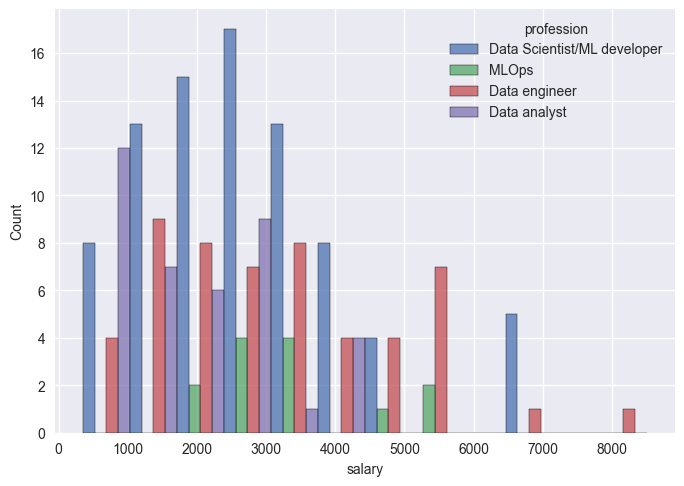

In [10]:
sns.histplot(data=df, x="salary",   hue="profession", multiple="dodge", shrink=1)

#### Влияние опыта на зарплату

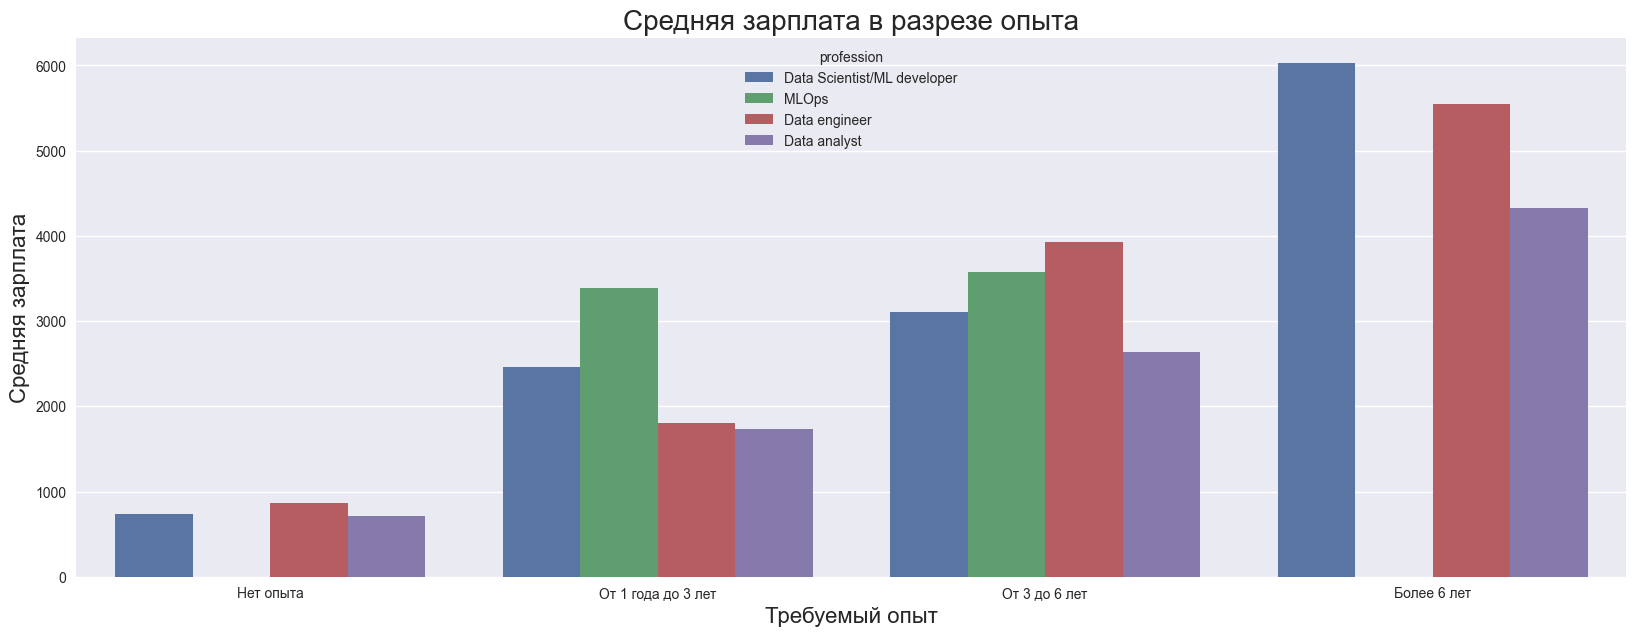

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
barplot1 = sns.barplot(
    data=df,
    x='experience.name',
    y='salary',
    hue = 'profession',
    ci=None
)
barplot1.tick_params(axis='x', rotation=0);
barplot1.set_title('Средняя зарплата в разрезе опыта', fontsize=20);
barplot1.set_xlabel('Требуемый опыт', fontsize=16);
barplot1.set_ylabel('Средняя зарплата', fontsize=16);

Интересно так же посмотреть на максимальную зарплату в разрезе опыта

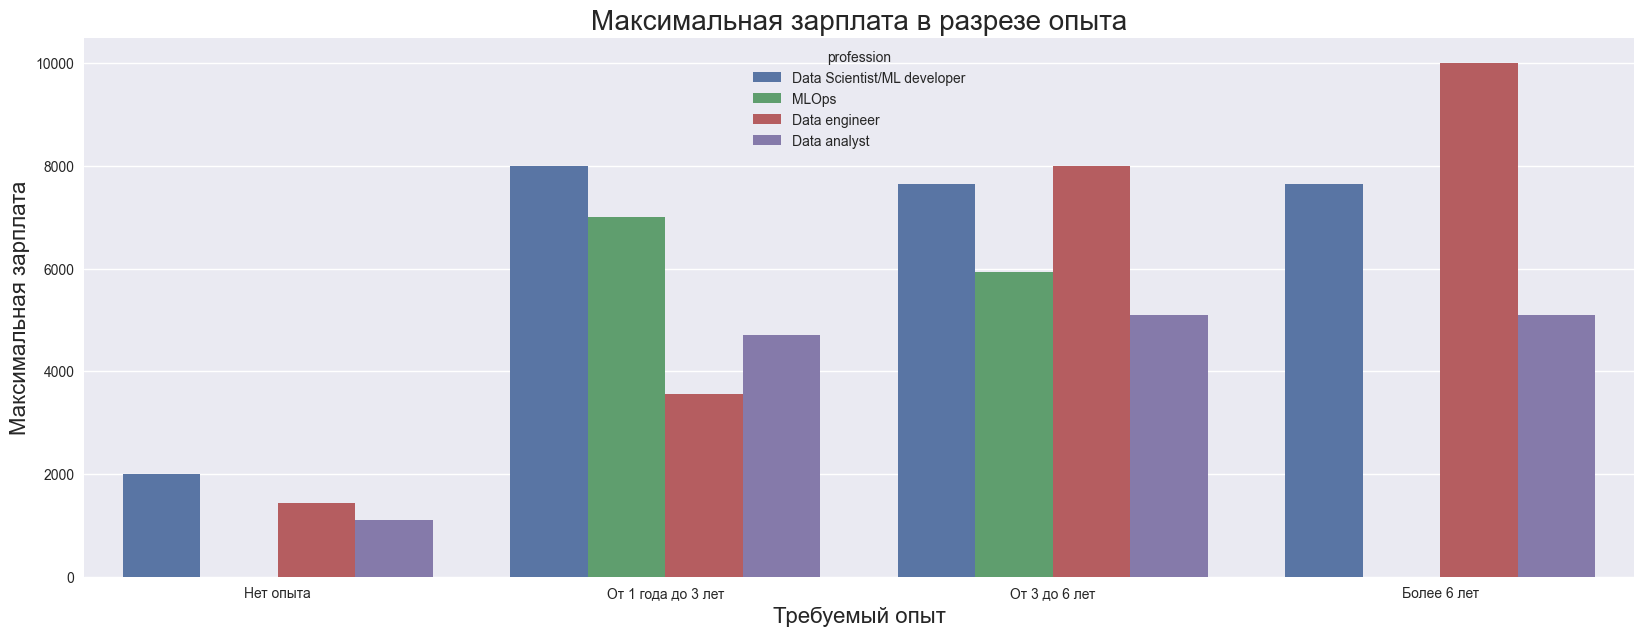

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
barplot1 = sns.barplot(
    data=df,
    x='experience.name',
    y='salary_to',
    hue = 'profession',
    estimator='max',
    ci=None
)
barplot1.tick_params(axis='x', rotation=0);
barplot1.set_title('Максимальная зарплата в разрезе опыта', fontsize=20);
barplot1.set_xlabel('Требуемый опыт', fontsize=16);
barplot1.set_ylabel('Максимальная зарплата', fontsize=16);


In [43]:
df.groupby(['profession','experience.name']).aggregate({'salary_to':['min', 'mean', 'median','max'] })

salary_to                       \
                                                     min         mean  median   
profession                  experience.name                                     
Data Scientist/ML developer Более 6 лет           5579.0  6743.333333  7000.0   
                            Нет опыта              415.0   917.200000   679.0   
                            От 1 года до 3 лет     670.0  2955.900000  2546.0   
                            От 3 до 6 лет          546.0  3716.285714  3561.0   
Data analyst                Более 6 лет           5093.0  5093.000000  5093.0   
                            Нет опыта              679.0   830.500000   771.5   
                            От 1 года до 3 лет     679.0  2044.250000  1780.0   
                            От 3 до 6 лет         1527.0  3075.100000  2908.5   
Data engineer               Более 6 лет           4155.0  6447.800000  5942.0   
                            Нет опыта              593.0  1013.750000  1009.5   
                            От 1 года до 3 лет    1103.0  2105.250000  1867.0   
                            От 3 до 6 лет         2374.0  4540.714286  4155.0   
MLOps                       Более 6 лет              NaN          NaN     NaN   
                            Нет опыта                NaN          NaN     NaN   
                            От 1 года до 3 лет    2374.0  4162.000000  3324.0   
                            От 3 до 6 лет         3395.0  4273.500000  4077.5   

                                                         
                                                    max  
profession                  experience.name              
Data Scientist/ML developer Более 6 лет          7651.0  
                            Нет опыта            2000.0  
                            От 1 года до 3 лет   8000.0  
                            От 3 до 6 лет        7651.0  
Data analyst                Более 6 лет          5093.0  
                            Нет опыта            1100.0  
                            От 1 года до 3 лет   4700.0  
                            От 3 до 6 лет        5093.0  
Data engineer               Более 6 лет         10000.0  
                            Нет опыта            1443.0  
                            От 1 года до 3 лет   3561.0  
                            От 3 до 6 лет        8000.0  
MLOps                       Более 6 лет             NaN  
                            Нет опыта               NaN  
                            От 1 года до 3 лет   7000.0  
                            От 3 до 6 лет        5936.0